In [1]:
# Instalar paquete anastruct
!pip install git+https://github.com/EnriqueGarMac/Estructuras_I.git

  Cloning https://github.com/EnriqueGarMac/Estructuras_I.git to /tmp/pip-req-build-eqkpo1wu
  Running command git clone -q https://github.com/EnriqueGarMac/Estructuras_I.git /tmp/pip-req-build-eqkpo1wu
  Created wheel for anastruct: filename=anastruct-0.0.0-py3-none-any.whl size=58912 sha256=aa430431156bcefc73b08b411a13be5f20c685c4a3003781a5ee94939d141314
  Stored in directory: /tmp/pip-ephem-wheel-cache-v432hmlr/wheels/23/97/1a/d460d2d29ccd27f0842a8e862290c78834c55be12783542415
Successfully built anastruct


In [2]:

import numpy as np
from anastruct import SystemElements

ss = SystemElements()

h = 4.0 # Ancho celda
hv = 4.5 # Alto montantes

Ar = 0.01 # Area
Ey = 210e+3 # Módulo de Young

F1 = -50.0E+3 # Carga F1
F2 = -100.0E+3 # Carga F2
F3 = -150.0E+3 # Carga F3
F4 = -200.0E+3 # Carga F4

# Añadimos cordones inferiores
ss.add_truss_element(location=[[0,0], [h,0]],EA=Ey*Ar)
ss.add_truss_element(location=[[h,0], [2*h,0]],EA=Ey*Ar)
ss.add_truss_element(location=[[2*h,0], [3*h,0]],EA=Ey*Ar)
ss.add_truss_element(location=[[3*h,0], [4*h,0]],EA=Ey*Ar)
ss.add_truss_element(location=[[4*h,0], [5*h,0]],EA=Ey*Ar)
ss.add_truss_element(location=[[5*h,0], [6*h,0]],EA=Ey*Ar)
ss.add_truss_element(location=[[6*h,0], [7*h,0]],EA=Ey*Ar)
ss.add_truss_element(location=[[7*h,0], [8*h,0]],EA=Ey*Ar)

# Añadimos cordones superiores
ss.add_truss_element(location=[[h,hv], [2*h,hv]],EA=Ey*Ar)
ss.add_truss_element(location=[[2*h,hv], [3*h,hv]],EA=Ey*Ar)
ss.add_truss_element(location=[[3*h,hv], [4*h,hv]],EA=Ey*Ar)
ss.add_truss_element(location=[[4*h,hv], [5*h,hv]],EA=Ey*Ar)
ss.add_truss_element(location=[[5*h,hv], [6*h,hv]],EA=Ey*Ar)
ss.add_truss_element(location=[[6*h,hv], [7*h,hv]],EA=Ey*Ar)

# Añadimos montantes
ss.add_truss_element(location=[[h,0], [h,hv]],EA=Ey*Ar)
ss.add_truss_element(location=[[2*h,0], [2*h,hv]],EA=Ey*Ar)
ss.add_truss_element(location=[[3*h,0], [3*h,hv]],EA=Ey*Ar)
ss.add_truss_element(location=[[4*h,0], [4*h,hv]],EA=Ey*Ar)
ss.add_truss_element(location=[[5*h,0], [5*h,hv]],EA=Ey*Ar)
ss.add_truss_element(location=[[6*h,0], [6*h,hv]],EA=Ey*Ar)
ss.add_truss_element(location=[[7*h,0], [7*h,hv]],EA=Ey*Ar)

# Añadimos diagonales
ss.add_truss_element(location=[[0,0], [h,hv]],EA=Ey*Ar)
ss.add_truss_element(location=[[h,0], [2*h,hv]],EA=Ey*Ar)
ss.add_truss_element(location=[[2*h,0], [3*h,hv]],EA=Ey*Ar)
ss.add_truss_element(location=[[3*h,0], [4*h,hv]],EA=Ey*Ar)
ss.add_truss_element(location=[[4*h,hv], [5*h,0]],EA=Ey*Ar)
ss.add_truss_element(location=[[5*h,hv], [6*h,0]],EA=Ey*Ar)
ss.add_truss_element(location=[[6*h,hv], [7*h,0]],EA=Ey*Ar)
ss.add_truss_element(location=[[7*h,hv], [8*h,0]],EA=Ey*Ar)


# Añadimos rótula al nodo 1
ss.add_support_hinged(node_id=1)
# Añadimos carrito al nodo 4
ss.add_support_roll(node_id=9, direction=2)

# Añadimos carga puntual al nodo 2
ss.point_load(10, Fy=F1)
ss.point_load(11, Fy=F2)
ss.point_load(12, Fy=F3)
ss.point_load(13, Fy=F4)
ss.point_load(14, Fy=F3)
ss.point_load(15, Fy=F2)
ss.point_load(16, Fy=F1)




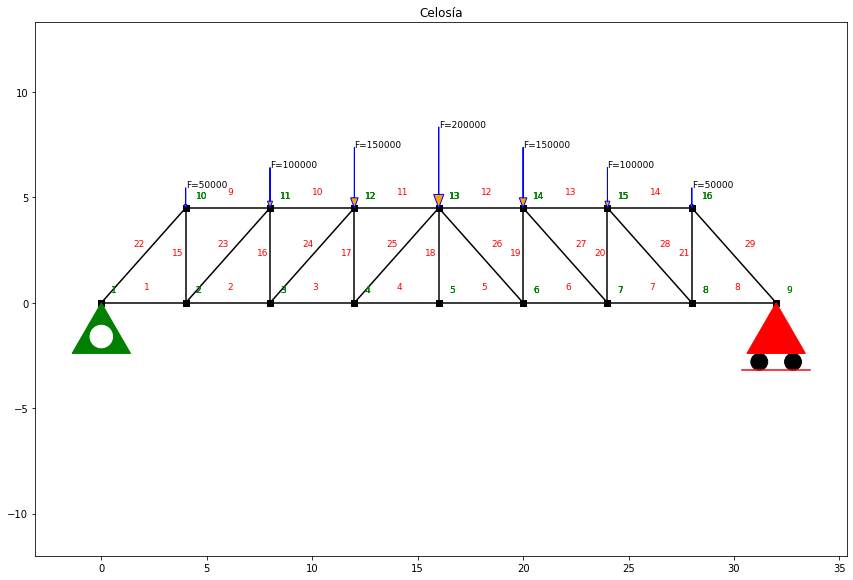

In [4]:
# Mostramos estructura generada
ss.show_structure(title='Celosía')

In [6]:
# Resolvemos la estructura
ss.solve();


Reacciones
***************************
*Nodo:  1
Reacción Fx:  -3.3760443329811096e-09
*Nodo:  1
Reacción Fy:  400000.00000000605
*Nodo:  9
Reacción Fx:  1.280568540096283e-09
*Nodo:  9
Reacción Fy:  400000.0000000089


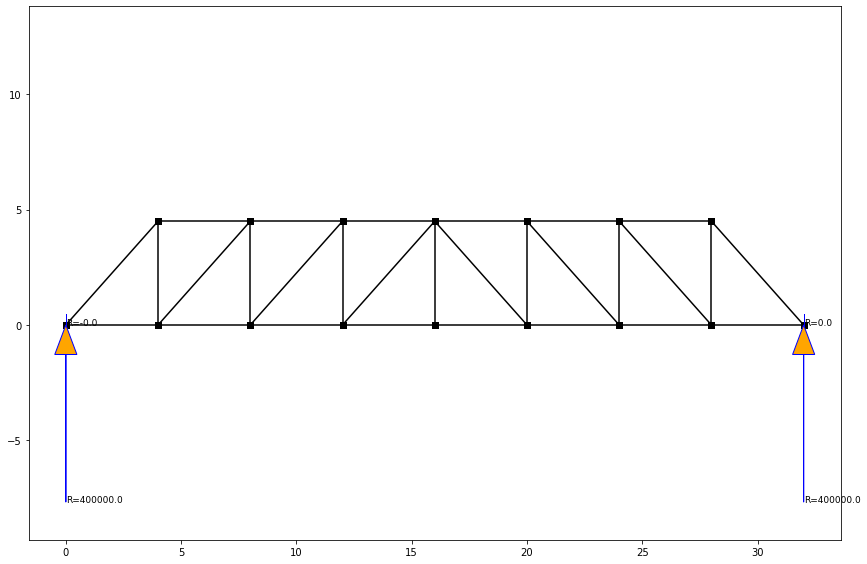

-------------------------------------------


In [7]:
# Mostramos las reacciones
ss.show_reaction_force()

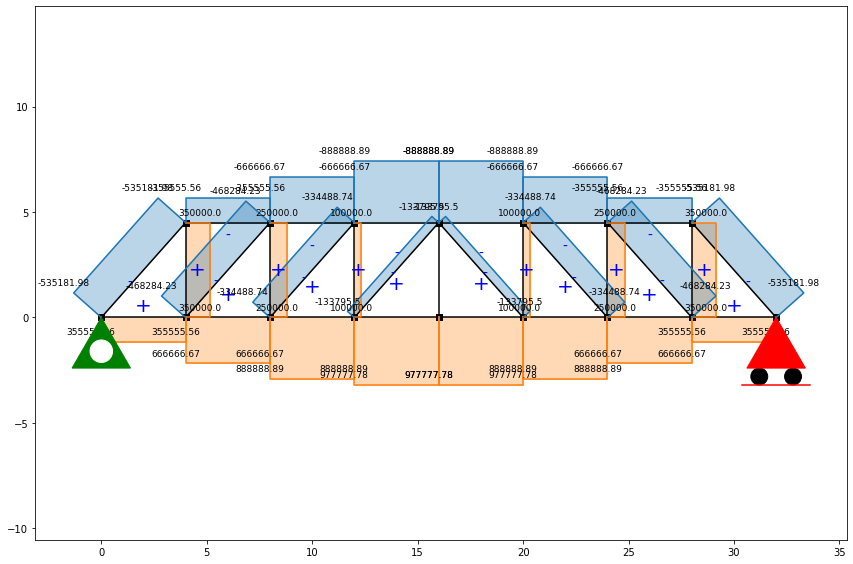

In [8]:
# Mostramos axiles
ss.show_axial_force()



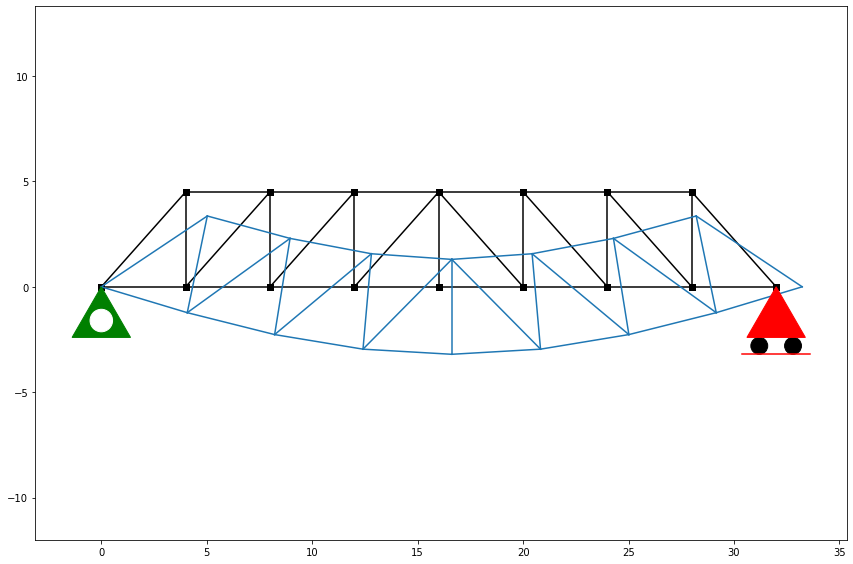

In [9]:
# Mostramos deformada
ss.show_displacement()

Reacciones
***************************
*Nodo:  1
Reacción Fx:  -3.3760443329811096e-09
*Nodo:  1
Reacción Fy:  400000.00000000605
*Nodo:  9
Reacción Fx:  1.280568540096283e-09
*Nodo:  9
Reacción Fy:  400000.0000000089


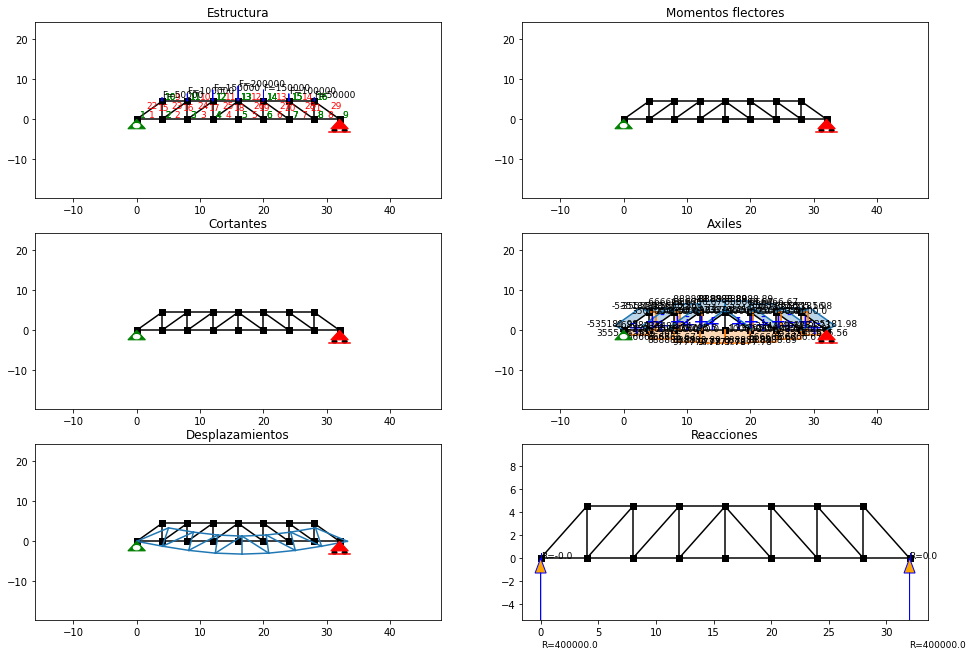

In [10]:
# Mostramos todos los resultados juntos
ss.plotter.results_plot()